In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
#importing the dataset
dataset = pd.read_csv("creditcard.csv")

dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
#we are using robust scalar though it is less affected by the outliers 

from sklearn.preprocessing import RobustScaler

R_scalar = RobustScaler()
dataset['amount'] = R_scalar.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['time'] = R_scalar.fit_transform(dataset['Time'].values.reshape(-1,1))

In [11]:
#lets drop the unscaled data
dataset.drop(['Time','Amount'],axis=1,inplace = True)
amount = dataset['amount']
time = dataset['time']

dataset.drop(['amount','time'], axis=1, inplace=True)
dataset.insert(0, 'scaled_amount', amount)
dataset.insert(1, 'scaled_time', time)

In [12]:
fraud = dataset.loc[dataset['Class'] == 1]


In [13]:
non_fraud = dataset.loc[dataset['Class'] == 0][:492]

In [14]:
new_dataset = pd.concat([fraud,non_fraud])
dataset = new_dataset
dataset.count()

scaled_amount    984
scaled_time      984
V1               984
V2               984
V3               984
V4               984
V5               984
V6               984
V7               984
V8               984
V9               984
V10              984
V11              984
V12              984
V13              984
V14              984
V15              984
V16              984
V17              984
V18              984
V19              984
V20              984
V21              984
V22              984
V23              984
V24              984
V25              984
V26              984
V27              984
V28              984
Class            984
dtype: int64

In [15]:
testing_dataset = dataset

In [16]:
#original dataset for testing 
from sklearn.model_selection import train_test_split
dataset_testing_x = testing_dataset.drop(['Class'],axis=1)
dataset_testing_y = testing_dataset['Class'] 
X_train_tes, X_test_tes, y_train_tes, y_test_tes = train_test_split(dataset_testing_x, dataset_testing_y, test_size=0.25, random_state=42)

In [17]:
#from sklearn.model_selection import train_test_split
dataset.head()
dataset_und_x = dataset.drop(['Class'],axis=1)
dataset_und_y = dataset['Class'] 
X_train_und, X_test_und, y_train_und, y_test_und = train_test_split(dataset_und_x, dataset_und_y, test_size=0.25, random_state=42)

In [49]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix,recall_score,roc_curve,precision_recall_curve,classification_report


In [18]:
#neural network implementation
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train_und.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [19]:
undersample_model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])
undersample_model.fit(X_train_und, y_train_und,batch_size=32, epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
738/738 [==============================] - 1s 976us/step - loss: 0.5170 - acc: 0.6463
Epoch 2/20
738/738 [==============================] - 0s 103us/step - loss: 0.3199 - acc: 0.8970
Epoch 3/20
738/738 [==============================] - 0s 88us/step - loss: 0.2344 - acc: 0.9444
Epoch 4/20
738/738 [==============================] - 0s 70us/step - loss: 0.1787 - acc: 0.9512
Epoch 5/20
738/738 [==============================] - 0s 46us/step - loss: 0.1431 - acc: 0.9539
Epoch 6/20
738/738 [==============================] - 0s 69us/step - loss: 0.1200 - acc: 0.9593
Epoch 7/20
738/738 [==============================] - 0s 105us/step - loss: 0.1047 - acc: 0.9634
Epoch 8/20
738/738 [==============================] - 0s 85us/step - loss: 0.0941 - acc: 0.9648
Epoch 9/20
738/738 [==============================] - 0s 86us/step - loss: 0.0866 - acc: 0.9661
Epoch 10/20
738/738 [==============================] - 0s 104us/step - loss: 0.0802 -

In [27]:
y_pred = undersample_model.predict(X_test_und)
y_pred = (y_pred > 0.5)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_und, y_pred)
cm

array([[118,   2],
       [  4, 122]], dtype=int64)

In [29]:
accuracy_score(y_test_und, y_pred)

0.975609756097561

In [30]:
f1_score(y_test_und, y_pred, average='weighted')

0.9756129812537795

In [31]:
recall_score(y_test_und, y_pred,average='weighted')

0.975609756097561

In [51]:
print(classification_report(y_test_und,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       120
           1       0.98      0.97      0.98       126

    accuracy                           0.98       246
   macro avg       0.98      0.98      0.98       246
weighted avg       0.98      0.98      0.98       246



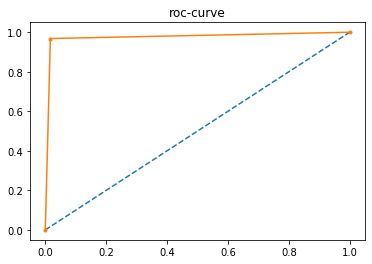

In [47]:
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y_test_und, y_pred)
# plot no skill
pyplot.title("roc-curve")
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [45]:
precision, recall, thresholds = precision_recall_curve(y_test_und, y_pred)

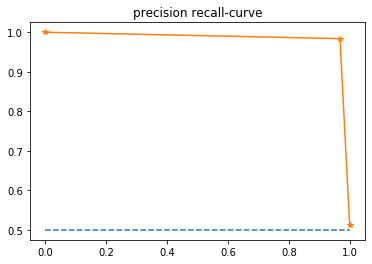

In [48]:
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
pyplot.plot(recall, precision, marker='*')
pyplot.title("precision recall-curve")
# show the plot
pyplot.show()

In [35]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5
                                  , metric='minkowski', p=2)
classifier.fit(X_train_und, y_train_und)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
Y_pred= classifier.predict(X_test_und)

In [37]:
accuracy_score(y_test_und, Y_pred)

0.9512195121951219

In [38]:
f1_score(y_test_und, Y_pred, average='weighted')

0.9512066141285421

In [39]:
recall_score(y_test_und, Y_pred,average='weighted')

0.9512195121951219

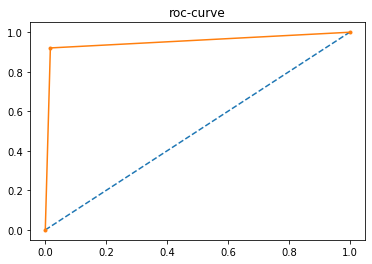

In [55]:
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y_test_und, Y_pred)
pyplot.title("roc-curve")
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [52]:
print(classification_report(y_test_und,Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       120
           1       0.98      0.92      0.95       126

    accuracy                           0.95       246
   macro avg       0.95      0.95      0.95       246
weighted avg       0.95      0.95      0.95       246



In [54]:
confusion_matrix(y_test_und,Y_pred)

array([[118,   2],
       [ 10, 116]], dtype=int64)

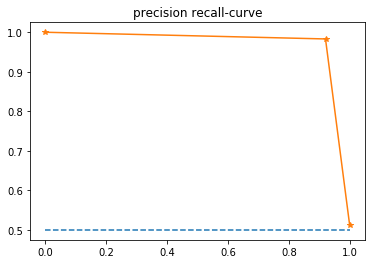

In [56]:
precision, recall, thresholds = precision_recall_curve(y_test_und, Y_pred)
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
pyplot.plot(recall, precision, marker='*')
pyplot.title("precision recall-curve")
# show the plot
pyplot.show()